<a href="https://colab.research.google.com/github/babs257/Machine-Learning/blob/main/Customer_Review_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER REVIEW PREDICTION

### LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import HTML
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### DATA LOADING AND EXPLORATION

In [ ]:
!gdown 1R-oMtWKbYaLDI8QrnqUxs1o7_sSnI0zE

df = pd.read_csv('amazon_reviews_us_Furniture_v1_00.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1R-oMtWKbYaLDI8QrnqUxs1o7_sSnI0zE
From (redirected): https://drive.google.com/uc?id=1R-oMtWKbYaLDI8QrnqUxs1o7_sSnI0zE&confirm=t&uuid=c4d77976-e168-47a4-95ec-f18db36273ae
To: /content/amazon_reviews_us_Furniture_v1_00.csv
100% 375M/375M [00:03<00:00, 110MB/s]


<ipython-input-156-078d50582ec1>:3: DtypeWarning: Columns (1,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('amazon_reviews_us_Furniture_v1_00.csv')


In [ ]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_headline,review_body,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,US,24509695,R3VR960AHLFKDV,B004HB5E0E,488241329.0,Shoal Creek Computer Desk,Furniture,4.0,0.0,0.0,...,... desk is very study and it i has a beautifu...,This desk is very study and it i has a beauti...,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,34731776,R16LGVMFKIUT0G,B0042TNMMS,205864445.0,Dorel Home Products Delaney Large Rectangular ...,Furniture,5.0,0.0,0.0,...,Five Stars,Great item,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,1272331,R1AIMEEPYHMOE4,B0030MPBZ4,124663823.0,Bathroom Vanity Table Jewelry Makeup Desk Benc...,Furniture,5.0,1.0,1.0,...,Five Stars,"Perfect fit for my bedroom, been wanting one s...",31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,45284262,R1892CCSZWZ9SR,B005G02ESA,382367578.0,Sleep Master Ultima Comfort Memory Foam 6 Inch...,Furniture,3.0,0.0,0.0,...,Good enough,"We use this on a trundle bed. So, it does not...",31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,30003523,R285P679YWVKD1,B005JS8AUA,309497463.0,"1 1/4"" GashGuards: Deluxe Rubberized Plastic B...",Furniture,3.0,0.0,0.0,...,Gash Gards for daybed,The product is fine...just seemed like it took...,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791697,US,52940456,R1F7BNIK2R72ZC,B000050FF8,161996292.0,HoMedics BLTW-100 21-Inch AquaScape Twist Bubb...,Furniture,5.0,21.0,21.0,...,A great deal!,I sort of collect water fountains and most hav...,07/11/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791698,US,50562473,RVR3U3QA0D95B,B00000K0CL,328789022.0,Midnight Motion Lamp with White Lava and Blue ...,Furniture,5.0,10.0,11.0,...,This Lava Lamp is great!,I just got my lava lamp 2 days ago and I just ...,28/10/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791699,US,51137498,R1X5JB9UJRZW31,B00004SZ5M,547720134.0,Maglite Solitaire Incandescent 1-Cell AAA Flas...,Furniture,5.0,3.0,5.0,...,You can't go wrong owning one of these,"This is similar to other mag-lites, except in ...",16/07/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791700,US,49843940,R235PHRTF7BFK7,B00004SBJJ,685482907.0,"Le Creuset Stoneware 1-Quart Crock, White",Furniture,4.0,5.0,5.0,...,Everybody can use a little Le Creuset,I purchased this little pot as a gift for a fr...,12/06/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
need = ['star_rating', 'review_body','verified_purchase', 'helpful_votes', 'total_votes']
df = pd.read_csv('amazon_reviews_us_Furniture_v1_00.csv',usecols=lambda column: column in need)

In [ ]:
print(df.isnull().sum())

star_rating            1
helpful_votes          1
total_votes            1
verified_purchase      1
review_body          115
dtype: int64


In [ ]:
df.dropna(inplace=True)

# Handling duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...
1,5.0,0.0,0.0,Y,Great item
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s..."
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not..."
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...
...,...,...,...,...,...
791697,5.0,21.0,21.0,N,I sort of collect water fountains and most hav...
791698,5.0,10.0,11.0,N,I just got my lava lamp 2 days ago and I just ...
791699,5.0,3.0,5.0,N,"This is similar to other mag-lites, except in ..."
791700,4.0,5.0,5.0,N,I purchased this little pot as a gift for a fr...


In [ ]:
# Clean text data (review_body)
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

df['cleaned_review_body'] = df['review_body'].apply(clean_text)


In [ ]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...
1,5.0,0.0,0.0,Y,Great item,great item
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...
...,...,...,...,...,...,...
791697,5.0,21.0,21.0,N,I sort of collect water fountains and most hav...,sort collect water fountains loud pump bought ...
791698,5.0,10.0,11.0,N,I just got my lava lamp 2 days ago and I just ...,got lava lamp 2 days ago want say really good ...
791699,5.0,3.0,5.0,N,"This is similar to other mag-lites, except in ...",similar maglites except tiny package lightweig...
791700,4.0,5.0,5.0,N,I purchased this little pot as a gift for a fr...,purchased little pot gift friendsomething hold...


In [ ]:
# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Sentiment polarity score [-1.0, 1.0]
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment, polarity

# Apply sentiment analysis to cleaned review body
df['sentiment'], df['polarity_score'] = zip(*df['cleaned_review_body'].apply(get_sentiment))

# Data Exploration
# Display a sample of the updated DataFrame including sentiment and polarity score
print("Sample of the Updated DataFrame:")
print(df[['review_body', 'cleaned_review_body', 'sentiment', 'polarity_score']].head(10))  # Display sample rows


Sample of the Updated DataFrame:
                                         review_body  \
0  This desk is very study and it i has  a beauti...   
1                                         Great item   
2  Perfect fit for my bedroom, been wanting one s...   
3  We use this on a trundle bed.  So, it does not...   
4  The product is fine...just seemed like it took...   
5     Love this product, amazing delivery, thank you   
6  I love this bench, had one in Black for over f...   
7  Have had this for over a year.  Very well made...   
8  This is the best step stool I have ever used. ...   
9                                   my son loves it!   

                                 cleaned_review_body sentiment  polarity_score  
0  desk study beautiful finish think little price...  positive        0.331250  
1                                         great item  positive        0.800000  
2  perfect fit bedroom wanting one since little girl  positive        0.404167  
3  use trundle bed get muc

In [ ]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667
...,...,...,...,...,...,...,...,...
791697,5.0,21.0,21.0,N,I sort of collect water fountains and most hav...,sort collect water fountains loud pump bought ...,negative,-0.020000
791698,5.0,10.0,11.0,N,I just got my lava lamp 2 days ago and I just ...,got lava lamp 2 days ago want say really good ...,positive,0.041667
791699,5.0,3.0,5.0,N,"This is similar to other mag-lites, except in ...",similar maglites except tiny package lightweig...,positive,0.174167
791700,4.0,5.0,5.0,N,I purchased this little pot as a gift for a fr...,purchased little pot gift friendsomething hold...,negative,-0.145833


sentiment
positive    660448
negative     78386
neutral      32045
Name: count, dtype: int64


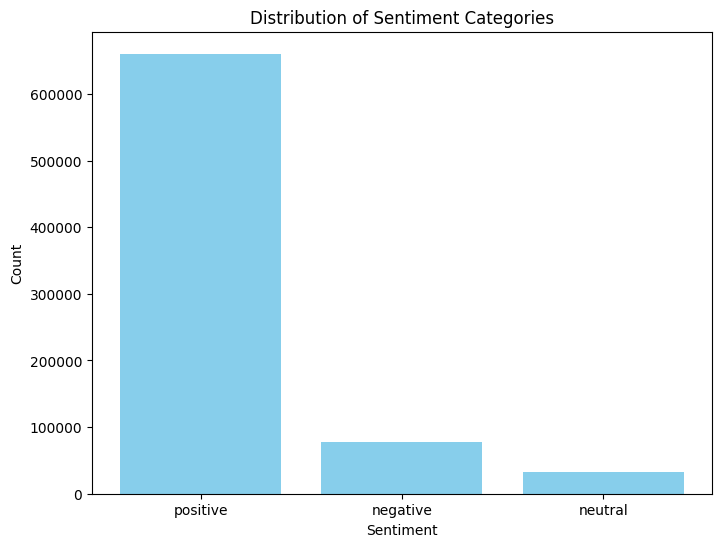

In [ ]:
print(df['sentiment'].value_counts())  # Count occurrences of each sentiment category

# Visualize distribution of sentiment categories
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Descriptive Statistics for Numeric Columns:
         star_rating  helpful_votes    total_votes  polarity_score
count  770879.000000  770879.000000  770879.000000   770879.000000
mean        4.066056       2.461350       2.852191        0.282327
std         1.313488      19.261207      20.574047        0.266051
min         1.000000       0.000000       0.000000       -1.000000
25%         4.000000       0.000000       0.000000        0.112208
50%         5.000000       0.000000       0.000000        0.271429
75%         5.000000       1.000000       2.000000        0.450000
max         5.000000    6390.000000    6509.000000        1.000000


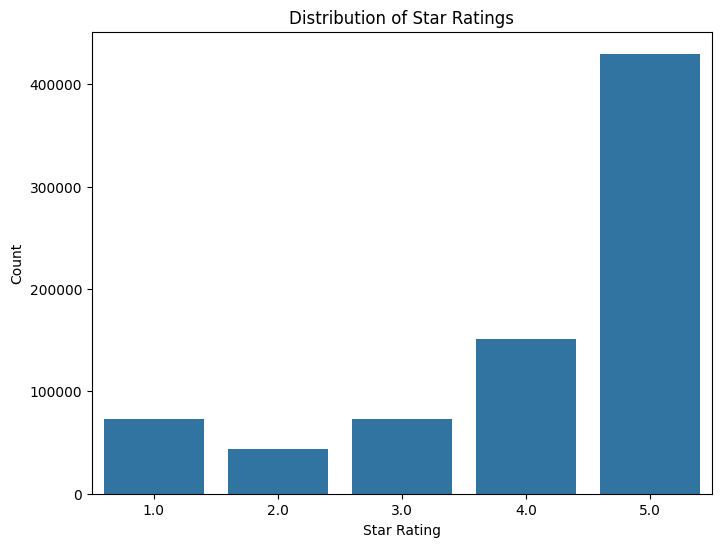

In [ ]:
# Explore descriptive statistics for numeric columns
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())  # Display summary statistics for all numeric columns

# Visualize the distribution of star ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='star_rating', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

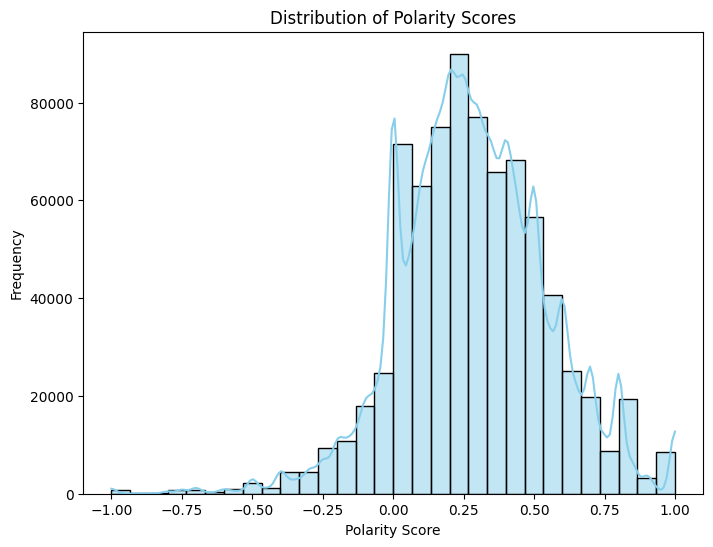

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['polarity_score'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Engineering
#Calculate length of reviews (number of words)
# df['review_length_words'] = df['cleaned_review_body'].apply(lambda x: len(x.split()))  # Word count

# Convert 'verified_purchase' to binary feature (is_verified)
df['is_verified'] = df['verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0)



In [ ]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000,1
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0
...,...,...,...,...,...,...,...,...,...
791697,5.0,21.0,21.0,N,I sort of collect water fountains and most hav...,sort collect water fountains loud pump bought ...,negative,-0.020000,0
791698,5.0,10.0,11.0,N,I just got my lava lamp 2 days ago and I just ...,got lava lamp 2 days ago want say really good ...,positive,0.041667,0
791699,5.0,3.0,5.0,N,"This is similar to other mag-lites, except in ...",similar maglites except tiny package lightweig...,positive,0.174167,0
791700,4.0,5.0,5.0,N,I purchased this little pot as a gift for a fr...,purchased little pot gift friendsomething hold...,negative,-0.145833,0


In [ ]:
#Calculate length of reviews (number of words)
df['review_length_words'] = df['cleaned_review_body'].apply(lambda x: len(x.split()))  # Word count

In [ ]:
df

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified,review_length_words
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1,8
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000,1,2
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1,8
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1,20
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0,16
...,...,...,...,...,...,...,...,...,...,...
791697,5.0,21.0,21.0,N,I sort of collect water fountains and most hav...,sort collect water fountains loud pump bought ...,negative,-0.020000,0,24
791698,5.0,10.0,11.0,N,I just got my lava lamp 2 days ago and I just ...,got lava lamp 2 days ago want say really good ...,positive,0.041667,0,48
791699,5.0,3.0,5.0,N,"This is similar to other mag-lites, except in ...",similar maglites except tiny package lightweig...,positive,0.174167,0,56
791700,4.0,5.0,5.0,N,I purchased this little pot as a gift for a fr...,purchased little pot gift friendsomething hold...,negative,-0.145833,0,35


### PREPROCESSING AND DATA SPLITING

In [ ]:
# # Extract key phrases or topics from reviews using TF-IDF vectorization
# # Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=80,  # Maximum number of features (top 1000 frequent terms)
                                 stop_words='english',  # Remove English stopwords
                                   ngram_range=(1, 2))  # Include unigrams and bigrams

# # Fit and transform the TF-IDF vectorizer on 'cleaned_review_body'
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review_body'])

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [ ]:
# Convert TF-IDF matrix to DataFrame and concatenate with original DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
df1 = pd.concat([df, tfidf_df], axis=1)

# # Display the updated DataFrame with additional features
print("Updated DataFrame with Additional Features:")
print(df1)  # Display sample rows with new features

Updated DataFrame with Additional Features:
        star_rating  helpful_votes  total_votes verified_purchase  \
0               4.0            0.0          0.0                 Y   
1               5.0            0.0          0.0                 Y   
2               5.0            1.0          1.0                 Y   
3               3.0            0.0          0.0                 Y   
4               3.0            0.0          0.0                 N   
...             ...            ...          ...               ...   
769174          NaN            NaN          NaN               NaN   
769187          NaN            NaN          NaN               NaN   
769189          NaN            NaN          NaN               NaN   
769632          NaN            NaN          NaN               NaN   
770445          NaN            NaN          NaN               NaN   

                                              review_body  \
0       This desk is very study and it i has  a beauti...   
1    

In [ ]:
df1

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified,review_length_words,...,table,thing,think,time,took,use,used,way,wood,work
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1.0,8.0,...,0.0,0.0,0.483554,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000,1.0,2.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1.0,8.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1.0,20.0,...,0.0,0.0,0.321711,0.000000,0.000000,0.779890,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0.0,16.0,...,0.0,0.0,0.000000,0.000000,0.553796,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.265473,0.000000,0.265904,0.0,0.0,0.0,0.0
769187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.180893,0.101307,0.181187,0.0,0.0,0.0,0.0
769189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
769632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
print(df1.isnull().sum())

star_rating          20694
helpful_votes        20694
total_votes          20694
verified_purchase    20694
review_body          20694
                     ...  
use                  20694
used                 20694
way                  20694
wood                 20694
work                 20694
Length: 90, dtype: int64


In [ ]:
df1.dropna(inplace=True)

# Handling duplicate rows
df1.drop_duplicates(inplace=True)

In [ ]:
print(df1.isnull().sum())

star_rating          0
helpful_votes        0
total_votes          0
verified_purchase    0
review_body          0
                    ..
use                  0
used                 0
way                  0
wood                 0
work                 0
Length: 90, dtype: int64


In [ ]:
df1

,star_rating,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified,review_length_words,...,table,thing,think,time,took,use,used,way,wood,work
0,4.0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1.0,8.0,...,0.0,0.000000,0.483554,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,5.0,0.0,0.0,Y,Great item,great item,positive,0.800000,1.0,2.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,5.0,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1.0,8.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1.0,20.0,...,0.0,0.000000,0.321711,0.0,0.000000,0.779890,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0.0,16.0,...,0.0,0.000000,0.000000,0.0,0.553796,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770874,2.0,0.0,4.0,Y,I dont know if I like the blind or not as for ...,dont know like blind didnt recieve parts shipp...,positive,0.070130,1.0,70.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
770875,5.0,0.0,0.0,Y,When we first received these tables I was a li...,first received tables little disappointed much...,positive,0.111242,1.0,76.0,...,0.0,0.715189,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
770876,1.0,9.0,10.0,Y,This is a poorly made piece of you know what. ...,poorly made piece know waste money angry spent...,negative,-0.172727,1.0,43.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.351006,0.0,0.0,0.0,0.0
770877,5.0,1.0,1.0,Y,I am very pleased with the with the appearance...,pleased appearance quality entertainment cente...,positive,0.220833,1.0,18.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.381483,0.0,0.0,0.0,0.0


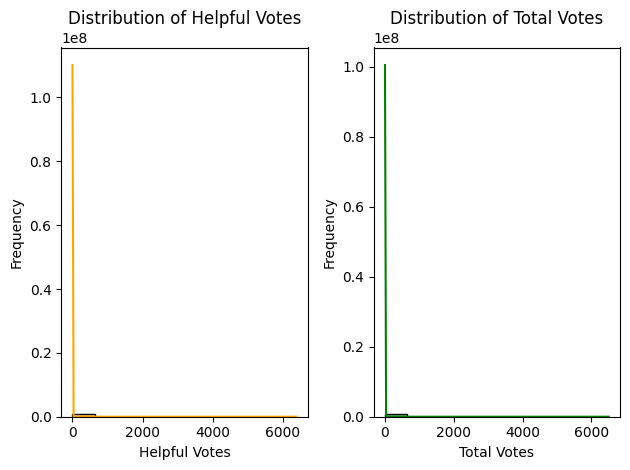

In [ ]:
#Histogram for helpful_votes
plt.subplot(1, 2, 1)
sns.histplot(df1['helpful_votes'], bins=10, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')

# Histogram for total_votes
plt.subplot(1, 2, 2)
sns.histplot(df1['total_votes'], bins=10, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

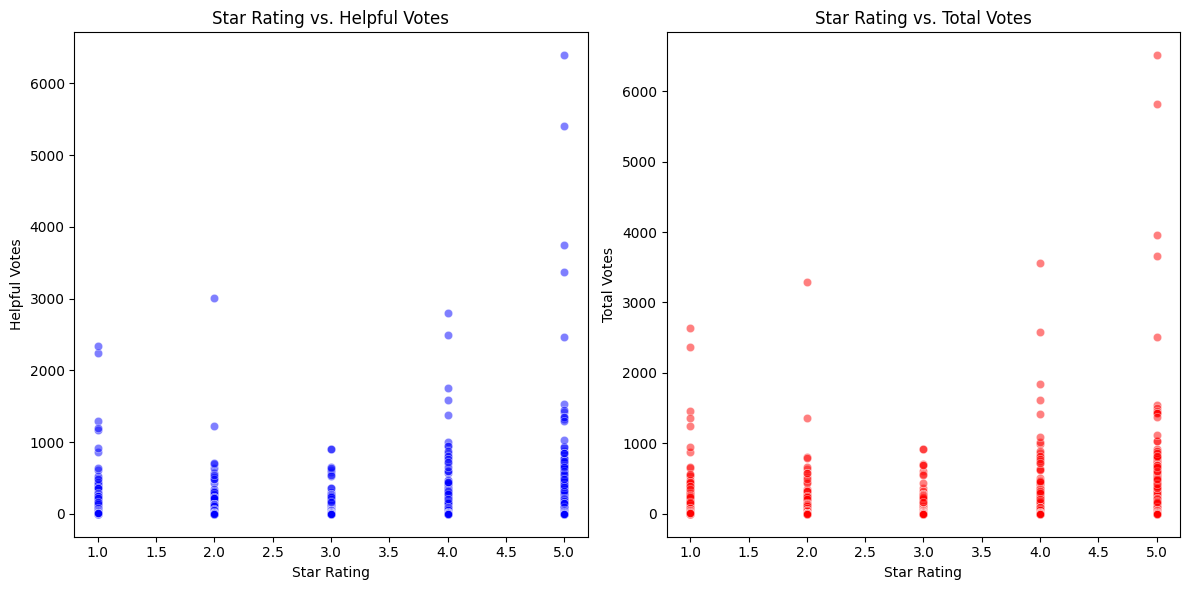

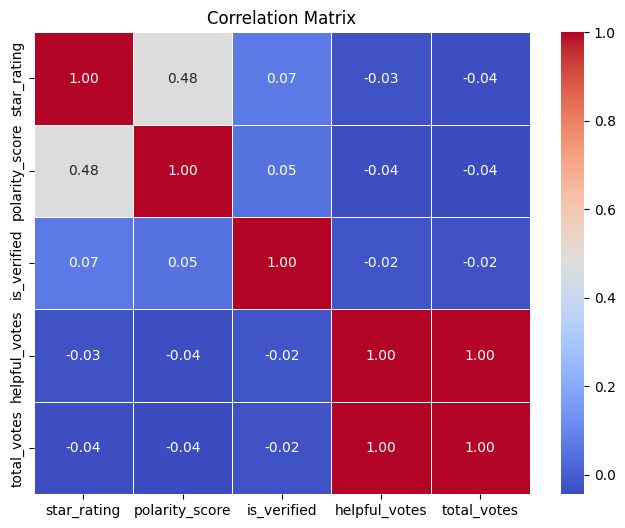

In [ ]:
# Analyze relationships between features using scatter plots and correlations
plt.figure(figsize=(12, 6))

# Scatter plot: star_rating vs. helpful_votes
plt.subplot(1, 2, 1)
sns.scatterplot(x='star_rating', y='helpful_votes', data=df1, color='blue', alpha=0.5)
plt.title('Star Rating vs. Helpful Votes')
plt.xlabel('Star Rating')
plt.ylabel('Helpful Votes')

# Scatter plot: star_rating vs. total_votes
plt.subplot(1, 2, 2)
sns.scatterplot(x='star_rating', y='total_votes', data=df1, color='red', alpha=0.5)
plt.title('Star Rating vs. Total Votes')
plt.xlabel('Star Rating')
plt.ylabel('Total Votes')

plt.tight_layout()
plt.show()

# Calculate correlations between features
correlation_matrix = df1[['star_rating','polarity_score','is_verified', 'helpful_votes', 'total_votes']].corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df1.drop(columns=['cleaned_review_body', 'verified_purchase','review_body'], inplace=True)

In [ ]:
df1

,star_rating,helpful_votes,total_votes,sentiment,polarity_score,is_verified,review_length_words,amazon,arrived,assemble,...,table,thing,think,time,took,use,used,way,wood,work
0,4.0,0.0,0.0,positive,0.331250,1.0,8.0,0.00000,0.0,0.0,...,0.0,0.000000,0.483554,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,5.0,0.0,0.0,positive,0.800000,1.0,2.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,5.0,1.0,1.0,positive,0.404167,1.0,8.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,positive,0.233333,1.0,20.0,0.00000,0.0,0.0,...,0.0,0.000000,0.321711,0.0,0.000000,0.779890,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,negative,-0.116667,0.0,16.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.553796,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770874,2.0,0.0,4.0,positive,0.070130,1.0,70.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
770875,5.0,0.0,0.0,positive,0.111242,1.0,76.0,0.00000,0.0,0.0,...,0.0,0.715189,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
770876,1.0,9.0,10.0,negative,-0.172727,1.0,43.0,0.42949,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.351006,0.0,0.0,0.0,0.0
770877,5.0,1.0,1.0,positive,0.220833,1.0,18.0,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.381483,0.0,0.0,0.0,0.0


In [ ]:
target_column = 'sentiment'

# Assuming 'df' is your DataFrame
X = df1.drop(target_column, axis=1)  # Features (remove the target column)
y = df1[target_column]  # Labels (only the target column)

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (750185, 86)
Shape of y: (750185,)


In [ ]:
X

,star_rating,helpful_votes,total_votes,polarity_score,is_verified,review_length_words,amazon,arrived,assemble,assembly,...,table,thing,think,time,took,use,used,way,wood,work
0,4.0,0.0,0.0,0.331250,1.0,8.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.483554,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,5.0,0.0,0.0,0.800000,1.0,2.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,5.0,1.0,1.0,0.404167,1.0,8.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.233333,1.0,20.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.321711,0.0,0.000000,0.779890,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,-0.116667,0.0,16.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.553796,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770874,2.0,0.0,4.0,0.070130,1.0,70.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
770875,5.0,0.0,0.0,0.111242,1.0,76.0,0.00000,0.0,0.0,0.0,...,0.0,0.715189,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
770876,1.0,9.0,10.0,-0.172727,1.0,43.0,0.42949,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.351006,0.0,0.0,0.0,0.0
770877,5.0,1.0,1.0,0.220833,1.0,18.0,0.00000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.381483,0.0,0.0,0.0,0.0


In [ ]:
y

0         positive
1         positive
2         positive
3         positive
4         negative
            ...   
770874    positive
770875    positive
770876    negative
770877    positive
770878    positive
Name: sentiment, Length: 750185, dtype: object

In [ ]:
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(exclude=['number']).columns.tolist()

# Create separate DataFrames for numerical and categorical variables
X_numerical = X[numerical_cols]
X_categorical = X[categorical_cols]

# Display information about numerical and categorical variables
print("Numerical Variables:")
print(X_numerical.head())

print("\nCategorical Variables:")
print(X_categorical.head())

Numerical Variables:
   star_rating  helpful_votes  total_votes  polarity_score  is_verified  \
0          4.0            0.0          0.0        0.331250          1.0   
1          5.0            0.0          0.0        0.800000          1.0   
2          5.0            1.0          1.0        0.404167          1.0   
3          3.0            0.0          0.0        0.233333          1.0   
4          3.0            0.0          0.0       -0.116667          0.0   

   review_length_words  amazon  arrived  assemble  assembly  ...  table  \
0                  8.0     0.0      0.0       0.0       0.0  ...    0.0   
1                  2.0     0.0      0.0       0.0       0.0  ...    0.0   
2                  8.0     0.0      0.0       0.0       0.0  ...    0.0   
3                 20.0     0.0      0.0       0.0       0.0  ...    0.0   
4                 16.0     0.0      0.0       0.0       0.0  ...    0.0   

   thing     think  time      took      use  used  way  wood  work  
0    0.0

In [ ]:
X.describe()

,star_rating,helpful_votes,total_votes,polarity_score,is_verified,review_length_words,amazon,arrived,assemble,assembly,...,table,thing,think,time,took,use,used,way,wood,work
count,750185.000000,750185.000000,750185.000000,750185.000000,750185.000000,750185.000000,750185.000000,750185.000000,750185.000000,750185.000000,...,750185.000000,750185.000000,750185.000000,750185.000000,750185.000000,750185.00000,750185.000000,750185.000000,750185.000000,750185.000000
mean,4.071746,2.359006,2.738554,0.283418,0.916150,28.300550,0.014395,0.021768,0.027425,0.018003,...,0.036324,0.014462,0.013158,0.028898,0.019037,0.03140,0.016539,0.017268,0.023879,0.017385
std,1.309787,19.289294,20.604358,0.266947,0.277163,38.907494,0.076853,0.095648,0.100083,0.086944,...,0.136003,0.078136,0.072257,0.104367,0.084101,0.11368,0.084953,0.084405,0.099961,0.089728
min,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.112500,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.272917,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,0.450000,1.000000,33.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,5.000000,6390.000000,6509.000000,1.000000,1.000000,2703.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X_train)

In [ ]:
X_scaled_test = scaler.transform(X_test)

In [ ]:
X_scaled_column = scaler.get_feature_names_out()
X_train= pd.DataFrame(X_scaled, columns=X_scaled_column)

In [ ]:
X_test = pd.DataFrame(X_scaled_test, columns=X_scaled_column)

In [ ]:
X_train

,star_rating,helpful_votes,total_votes,polarity_score,is_verified,review_length_words,amazon,arrived,assemble,assembly,...,table,thing,think,time,took,use,used,way,wood,work
0,1.00,0.000939,0.000922,0.545139,1.0,0.016648,0.000000,0.369612,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,1.00,0.000000,0.000154,0.566667,1.0,0.005549,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.50,0.000156,0.000154,0.509136,1.0,0.037366,0.000000,0.000000,0.0,0.000000,...,0.000000,0.222422,0.0,0.000000,0.0,0.0,0.216463,0.211317,0.0,0.0
3,0.75,0.000000,0.000000,0.690000,1.0,0.009249,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.75,0.000313,0.000307,0.741250,1.0,0.008509,0.221707,0.403179,0.0,0.000000,...,0.567387,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525124,1.00,0.000000,0.000000,0.608333,1.0,0.001480,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
525125,0.50,0.000939,0.000922,0.525000,1.0,0.005179,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
525126,1.00,0.000000,0.000000,0.916667,1.0,0.002960,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
525127,1.00,0.000469,0.000461,0.750000,1.0,0.007029,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.244561,0.0,0.0,0.292538,0.000000,0.0,0.0


In [ ]:
X_test

,star_rating,helpful_votes,total_votes,polarity_score,is_verified,review_length_words,amazon,arrived,assemble,assembly,...,table,thing,think,time,took,use,used,way,wood,work
0,1.00,0.000000,0.000000,0.720000,1.0,0.004809,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.75,0.000469,0.000461,0.574583,1.0,0.030707,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.50,0.001408,0.001997,0.550000,1.0,0.003700,0.0,0.000000,0.389243,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,1.00,0.000469,0.000615,0.608333,1.0,0.007769,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,1.00,0.000000,0.000000,0.500000,1.0,0.001110,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225051,1.00,0.000000,0.000000,0.569531,0.0,0.018498,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
225052,1.00,0.000000,0.000000,0.705556,1.0,0.009619,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
225053,1.00,0.000626,0.000768,0.610565,1.0,0.029967,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.153654,0.687019,0.000000,0.0,0.149955,0.000000
225054,0.50,0.000000,0.000000,0.587500,1.0,0.009989,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.524042,0.0,0.000000,0.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
y_test

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

### XGBOOST MODEL

In [ ]:
from sklearn.metrics import classification_report
import xgboost as xgb

clf = xgb.XGBClassifier(objective='multi:softmax',  # Multiclass classification
                        num_class=3,  # Number of classes (positive, negative, neutral)
                        eval_metric='mlogloss')  # Evaluation metric for multiclass

# Train the XGBoost classifier on the TF-IDF features
clf.fit(X_train, y_train)

# Predict sentiment labels for test data
y_pred = clf.predict(X_test)


# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22825
           1       0.95      0.99      0.97      9535
           2       1.00      1.00      1.00    192696

    accuracy                           1.00    225056
   macro avg       0.98      0.99      0.99    225056
weighted avg       1.00      1.00      1.00    225056



In [ ]:
joblib.dump(clf, 'clf_model.pk1')

['clf_model.pk1']

## CROSS VALIDATION AND USE OF PURCHASE INTENT AS LABEL



In [ ]:
df['Purchase_intent'] = (df['star_rating'] > 3).astype(int)
df.drop('star_rating', axis=1, inplace=True)

In [ ]:
df

,helpful_votes,total_votes,verified_purchase,review_body,cleaned_review_body,sentiment,polarity_score,is_verified,review_length_words,Purchase_intent
0,0.0,0.0,Y,This desk is very study and it i has a beauti...,desk study beautiful finish think little price...,positive,0.331250,1,8,1
1,0.0,0.0,Y,Great item,great item,positive,0.800000,1,2,1
2,1.0,1.0,Y,"Perfect fit for my bedroom, been wanting one s...",perfect fit bedroom wanting one since little girl,positive,0.404167,1,8,1
3,0.0,0.0,Y,"We use this on a trundle bed. So, it does not...",use trundle bed get much use much better choic...,positive,0.233333,1,20,0
4,0.0,0.0,N,The product is fine...just seemed like it took...,product finejust seemed like took awhile mail ...,negative,-0.116667,0,16,0
...,...,...,...,...,...,...,...,...,...,...
791697,21.0,21.0,N,I sort of collect water fountains and most hav...,sort collect water fountains loud pump bought ...,negative,-0.020000,0,24,1
791698,10.0,11.0,N,I just got my lava lamp 2 days ago and I just ...,got lava lamp 2 days ago want say really good ...,positive,0.041667,0,48,1
791699,3.0,5.0,N,"This is similar to other mag-lites, except in ...",similar maglites except tiny package lightweig...,positive,0.174167,0,56,1
791700,5.0,5.0,N,I purchased this little pot as a gift for a fr...,purchased little pot gift friendsomething hold...,negative,-0.145833,0,35,1


In [ ]:
df.drop(columns=['review_body', 'verified_purchase','sentiment'], inplace=True)

In [ ]:
df

,helpful_votes,total_votes,cleaned_review_body,polarity_score,is_verified,review_length_words,Purchase_intent
0,0.0,0.0,desk study beautiful finish think little price...,0.331250,1,8,1
1,0.0,0.0,great item,0.800000,1,2,1
2,1.0,1.0,perfect fit bedroom wanting one since little girl,0.404167,1,8,1
3,0.0,0.0,use trundle bed get much use much better choic...,0.233333,1,20,0
4,0.0,0.0,product finejust seemed like took awhile mail ...,-0.116667,0,16,0
...,...,...,...,...,...,...,...
791697,21.0,21.0,sort collect water fountains loud pump bought ...,-0.020000,0,24,1
791698,10.0,11.0,got lava lamp 2 days ago want say really good ...,0.041667,0,48,1
791699,3.0,5.0,similar maglites except tiny package lightweig...,0.174167,0,56,1
791700,5.0,5.0,purchased little pot gift friendsomething hold...,-0.145833,0,35,1


In [ ]:
# Example DataFrame 'df' containing cleaned review text and other features
X_text = df['cleaned_review_body']  # Textual feature (cleaned review text)
X_other = df[['helpful_votes', 'total_votes', 'is_verified', 'polarity_score', 'review_length_words']]  # Other numerical or categorical features

# Concatenate text and other features into a single DataFrame
X = pd.concat([X_text, X_other], axis=1)

# Target variable (purchase intent label)
y = df['Purchase_intent']




In [ ]:
X

,cleaned_review_body,helpful_votes,total_votes,is_verified,polarity_score,review_length_words
0,desk study beautiful finish think little price...,0.0,0.0,1,0.331250,8
1,great item,0.0,0.0,1,0.800000,2
2,perfect fit bedroom wanting one since little girl,1.0,1.0,1,0.404167,8
3,use trundle bed get much use much better choic...,0.0,0.0,1,0.233333,20
4,product finejust seemed like took awhile mail ...,0.0,0.0,0,-0.116667,16
...,...,...,...,...,...,...
791697,sort collect water fountains loud pump bought ...,21.0,21.0,0,-0.020000,24
791698,got lava lamp 2 days ago want say really good ...,10.0,11.0,0,0.041667,48
791699,similar maglites except tiny package lightweig...,3.0,5.0,0,0.174167,56
791700,purchased little pot gift friendsomething hold...,5.0,5.0,0,-0.145833,35


In [ ]:
y

0         1
1         1
2         1
3         0
4         0
         ..
791697    1
791698    1
791699    1
791700    1
791701    1
Name: Purchase_intent, Length: 770879, dtype: int64

In [ ]:
# Define preprocessing steps for text and other features (if needed)
text_transformer = TfidfVectorizer()
other_transformer = StandardScaler()

# Create a ColumnTransformer to apply different transformations to text and other features
preprocessor = ColumnTransformer([
    ('text', text_transformer, 'cleaned_review_body'),  # Apply TfidfVectorizer to text column
    ('other', other_transformer, ['helpful_votes', 'total_votes', 'is_verified', 'polarity_score', 'review_length_words'])  # Apply StandardScaler to other features
])

preprocessor_pipeline = Pipeline([
    ('preprocessor', preprocessor)  # Preprocess text and other features
])

In [ ]:
# Create a classifier for model training
clf1 = LogisticRegression()

# Create a model training pipeline (including preprocessing)
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocess text and other features
    ('clf1', clf1)  # Classifier (LogisticRegression) for model training
])

In [ ]:
# Perform cross-validation with combined features
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.89650789 0.89628736 0.8952885  0.89814887 0.89696773]
Mean Accuracy: 0.8966400697485101


In [ ]:
joblib.dump(model_pipeline , 'model.pk1')

['model.pk1']

## Testing new Dataset

In [ ]:
!gdown 1kWfAbO5rtMDtAKwx2HeP3x5lTfIym072

test_data= pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.csv')

Downloading...
From: https://drive.google.com/uc?id=1kWfAbO5rtMDtAKwx2HeP3x5lTfIym072
To: /content/amazon_reviews_us_Gift_Card_v1_00.csv
100% 40.2M/40.2M [00:00<00:00, 159MB/s]


<ipython-input-213-da586bb684fd>:3: DtypeWarning: Columns (4,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data= pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.csv')


In [ ]:
important = ['star_rating','review_body','verified_purchase', 'helpful_votes', 'total_votes']
test_data = pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.csv',usecols=lambda column: column in important)

<ipython-input-214-aa07fe33f075>:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.csv',usecols=lambda column: column in important)


In [ ]:
test_data

,star_rating,helpful_votes,total_votes,verified_purchase,review_body
0,5,0,0.0,Y,Great birthday gift for a young adult.
1,5,0,0.0,Y,It's an Amazon gift card and with over 9823983...
2,5,0,0.0,Y,Good
3,1,0,0.0,Y,Fair
4,5,0,0.0,Y,I can't believe how quickly Amazon can get the...
...,...,...,...,...,...
148566,5,10,10.0,N,Finally there is a way for your family to buy ...
148567,4,8,44.0,N,its very convenient to have an idea of how mut...
148568,5,20,30.0,N,Finally there is a way for your family to buy ...
148569,4,63,72.0,N,I picked up a few of these at Target a while b...


In [ ]:
print(test_data.isnull().sum())

star_rating          0
helpful_votes        0
total_votes          1
verified_purchase    1
review_body          9
dtype: int64


In [ ]:
test_data.dropna(inplace=True)

# Handling duplicate rows
test_data.drop_duplicates(inplace=True)

In [ ]:
test_data['star_rating'] = pd.to_numeric(test_data['star_rating'], errors='coerce')  # Coerce errors to NaN for non-convertible values
test_data['Purchase_intent'] = (test_data['star_rating'] > 3).astype(int)


In [ ]:
test_data.drop('star_rating', axis=1, inplace=True)

In [ ]:
test_data

,helpful_votes,total_votes,verified_purchase,review_body,Purchase_intent
0,0,0.0,Y,Great birthday gift for a young adult.,1
1,0,0.0,Y,It's an Amazon gift card and with over 9823983...,1
2,0,0.0,Y,Good,1
3,0,0.0,Y,Fair,0
4,0,0.0,Y,I can't believe how quickly Amazon can get the...,1
...,...,...,...,...,...
148566,10,10.0,N,Finally there is a way for your family to buy ...,1
148567,8,44.0,N,its very convenient to have an idea of how mut...,1
148568,20,30.0,N,Finally there is a way for your family to buy ...,1
148569,63,72.0,N,I picked up a few of these at Target a while b...,1


In [ ]:
test_data['cleaned_review_body'] = test_data['review_body'].apply(clean_text)

In [ ]:
test_data['sentiment'], test_data['polarity_score'] = zip(*test_data['cleaned_review_body'].apply(get_sentiment))

In [ ]:
test_data['is_verified'] = test_data['verified_purchase'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
test_data['review_length_words'] = test_data['cleaned_review_body'].apply(lambda x: len(x.split()))  # Word count

In [ ]:
# Example DataFrame 'df' containing cleaned review text and other features
X_text_new = test_data['cleaned_review_body']  # Textual feature (cleaned review text)
X_other_new = test_data[['helpful_votes', 'total_votes', 'is_verified', 'polarity_score', 'review_length_words']]  # Other numerical or categorical features

# Concatenate text and other features into a single DataFrame
X_new= pd.concat([X_text_new, X_other_new], axis=1)

# Target variable (purchase intent label)
y_new = test_data['Purchase_intent']

In [ ]:
X_new

,cleaned_review_body,helpful_votes,total_votes,is_verified,polarity_score,review_length_words
0,great birthday gift young adult,0,0.0,1,0.333333,5
1,amazon gift card 982398324908 items sure find ...,0,0.0,1,0.500000,9
2,good,0,0.0,1,0.700000,1
3,fair,0,0.0,1,0.700000,1
4,cant believe quickly amazon get hands thank,0,0.0,1,0.333333,7
...,...,...,...,...,...,...
148566,finally way family buy music without explain g...,10,10.0,0,0.300000,24
148567,convenient idea mutch spend downloads,8,44.0,0,0.000000,5
148568,finally way family buy music without explain g...,20,30.0,0,0.300000,27
148569,picked target back makes even easier get son g...,63,72.0,0,0.100000,22


In [ ]:
import joblib
model = joblib.load('/content/model.pk1')

In [ ]:
cv_scores = cross_val_score(model, X_new, y_new, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.95067055 0.95202923 0.95529467 0.95782149 0.95762712]
Mean Accuracy: 0.9546886124198884
